<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray"> Model</p>
</div>

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

In [1]:
!nvidia-smi

Wed Sep  6 05:45:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [2]:
import tensorflow as tf
print(tf.version.VERSION)


2.12.0


In [3]:
!pip install -q tensorflow==2.3.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.3.0


In [4]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 27.75 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [5]:
!pip install -Uqr models/official/requirements.txt


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.6/219.6 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 21.6 MB/s eta 0:

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.12.0
Eager mode:  True
Hub version:  0.14.0
GPU is available


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv(' https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',compression='zip',low_memory=False)
df.shape


(1306122, 3)

In [4]:
df.sample(5)

,qid,question_text,target
805933,9de803f7d0c7d89d8d02,What dissatisfies you?,0
455233,592f705a39f1f07289a5,Which models does the Mercedes-Benz SL-Class p...,0
82969,103da21a9e1b0a8af22f,What were the odds of Stanford winning the gam...,0
746663,9242c769f645f8750806,Is there any way to see the recently added fri...,0
487071,5f623062239f504d83f0,Does Nadi shuddhi done through pranayama helps...,0


<Axes: ylabel='Frequency'>

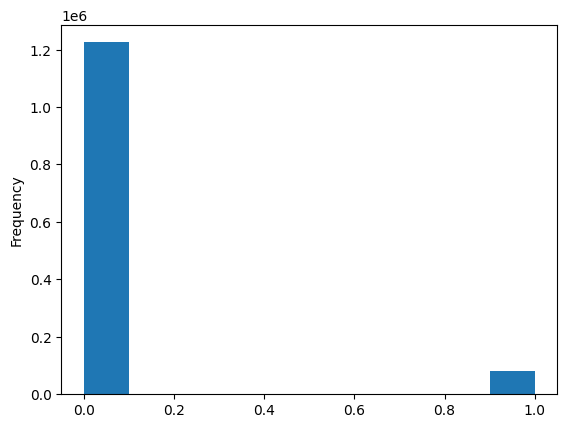

In [5]:
df.target.plot(kind='hist')

tf.data.Datasets for Training and Evaluation

In [6]:
train_df,remaining =train_test_split(df,random_state=42,train_size=0.0075,stratify=df['target'].values)
valid_df,_=train_test_split(remaining,random_state=42,train_size=0.00075,stratify=remaining.target.values)
train_df.shape,valid_df.shape

((9795, 3), (972, 3))

In [7]:
with tf.device('/cpu:0'):
  train_data=tf.data.Dataset.from_tensor_slices((train_df['question_text'].values,train_df.target.values))
  valid_data=tf.data.Dataset.from_tensor_slices((valid_df['question_text'].values,valid_df.target.values))
  for text,label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


 Pre-trained BERT Model from TensorFlow Hub

In [8]:



label_list=[0,1]
max_seq_length=128
train_batch_size=32


bert_layer=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",trainable=True)
vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case=bert_layer.resolved_object.do_lower_case.numpy()
tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case)

In [9]:
tokenizer.wordpiece_tokenizer.tokenize("hi, hello how are you?")

['hi', '##,', 'hello', 'how', 'are', 'you', '##?']

In [10]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize("hi, hello how are you?"))

[7632, 29623, 7592, 2129, 2024, 2017, 29632]

#Tokenizing and Preprocessing Text for BERT

In [11]:


def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example =classifier_data_lib.InputExample(guid=None,text_a=text.numpy(),text_b=None,label=label.numpy())
  feature=classifier_data_lib.convert_single_example(0,example,label_list,max_seq_length=max_seq_length,tokenizer=tokenizer)
  return (feature.input_ids,feature.input_mask,feature.segment_ids,feature.label_id)


In [12]:
def to_feature_map(text, label):
  input_ids,input_mask,segment_ids,label_id=tf.py_function(to_feature,inp=[text,label],Tout=[tf.int32,tf.int32,tf.int32,tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])
  x={"input_word_ids":input_ids,
     "input_mask":input_mask,
     "input_type_ids":segment_ids}
  return (x,label_id)

## TensorFlow Input Pipeline with tf.data

In [13]:
with tf.device('/cpu:0'):
  # train
  train_data=(train_data.map(to_feature_map,num_parallel_calls=tf.data.experimental.AUTOTUNE).shuffle(1000).batch(32,drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE))


  # valid
  valid_data=(valid_data.map(to_feature_map,
                             num_parallel_calls=tf.data.experimental.AUTOTUNE).shuffle(1000).batch(32,drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE))


In [14]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [15]:
# valid data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [16]:
# Building the model
def create_model():
  input_word_ids=tf.keras.layers.Input(shape=(max_seq_length,),name='input_word_ids',dtype=tf.int32)
  input_mask=tf.keras.layers.Input(shape=(max_seq_length,),name='input_mask',dtype=tf.int32)
  segment_ids=tf.keras.layers.Input(shape=(max_seq_length,),name='input_type_ids',dtype=tf.int32)
  pooled_output,sequence_output=bert_layer([input_word_ids,input_mask,segment_ids])
  drop=tf.keras.layers.Dropout(0.4)(pooled_output)
  output=tf.keras.layers.Dense(1,activation='sigmoid')(drop)
  return tf.keras.Model(inputs={"input_word_ids":input_word_ids,
     "input_mask":input_mask,
     "input_type_ids":segment_ids},outputs=output)

## Fine-Tuning BERT for Text Classification

In [17]:
model=create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),loss='binary_crossentropy',metrics=[tf.keras.metrics.BinaryAccuracy()])

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',         

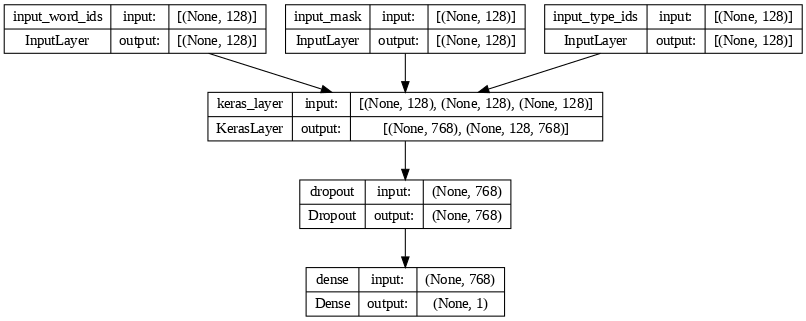

In [19]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=76)

In [20]:
# Train model

# tf.config.run_functions_eagerly(True)
epochs=4
history=model.fit(train_data,validation_data=valid_data,epochs=epochs,verbose=1)

Epoch 1/4
306/306 [==============================] - 307s 825ms/step - loss: 0.1702 - binary_accuracy: 0.9369 - val_loss: 0.1284 - val_binary_accuracy: 0.9583
Epoch 2/4
306/306 [==============================] - 257s 838ms/step - loss: 0.1102 - binary_accuracy: 0.9584 - val_loss: 0.1347 - val_binary_accuracy: 0.9594
Epoch 3/4
306/306 [==============================] - 260s 848ms/step - loss: 0.0679 - binary_accuracy: 0.9750 - val_loss: 0.1588 - val_binary_accuracy: 0.9625
Epoch 4/4
306/306 [==============================] - 261s 847ms/step - loss: 0.0332 - binary_accuracy: 0.9884 - val_loss: 0.2357 - val_binary_accuracy: 0.9615


Evaluate the model

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

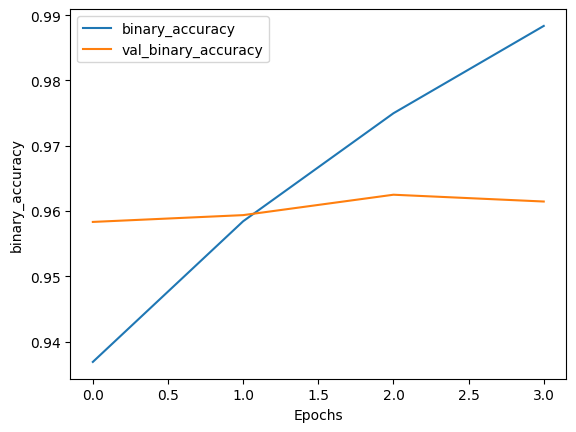

In [22]:
plot_graphs(history,'binary_accuracy')

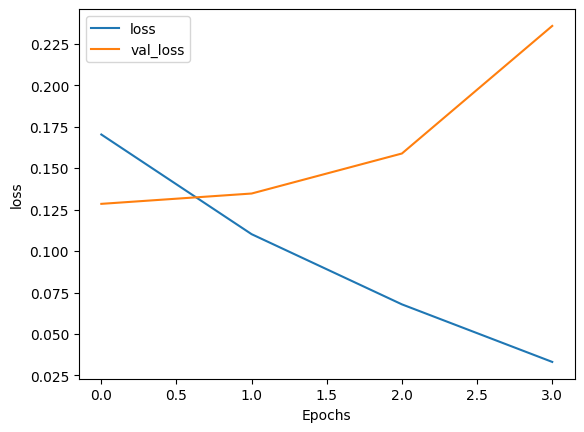

In [23]:
plot_graphs(history,'loss')

In [24]:
sample_example=['how long does it take to visit disneyland']
test_data=tf.data.Dataset.from_tensor_slices((sample_example,[0]*len(sample_example)))
test_data=(test_data.map(to_feature_map).batch(1))
preds=model.predict(test_data)
print(preds)
threshold=0.1
['insincere' if pred>=threshold else "sincere" for pred in preds]

1/1 [==============================] - 1s 946ms/step
[[6.957928e-05]]


['sincere']